## Set up
First you need to install GraphDB locally on you machine


In [1]:
from rdflib import ConjunctiveGraph
from SPARQLWrapper import SPARQLWrapper, JSON
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import numpy as np
from IPython.display import display, HTML



import pandas as pd

def remoteQuery(query, endpoint):
    endpoint.setQuery(query)
    try:
        result = endpoint.queryAndConvert()
        pd.set_option("display.max_rows",None,"display.max_colwidth",6000,"display.width",6000,)
        df = pd.DataFrame(result['results']['bindings'])
        df = df.applymap(lambda x: x['value'])
        return df
        #return (result['results']['bindings'])
    except Exception as e:
        print(e)



### With a GraphDB SPARQL endpoint

The input for SPARQLWrapper is the link to the GraphDB repository where you loaded the appropriate data set, in this example the dev version of EDAM (https://raw.githubusercontent.com/edamontology/edamontology/main/EDAM_dev.owl) and a bio.tools bioschemas turtle file (https://raw.githubusercontent.com/bio-tools/content/master/datasets/bioschemas-dump.ttl) was loaded in the GrapphDB repository. 


In [2]:
ep_biotools = SPARQLWrapper("http://localhost:7200/repositories/Project25")
ep_biotools.setReturnFormat(JSON)

## How many non-obsolete formats are in EDAM?

In [3]:
q= """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?format
    ?label
WHERE
{
    ?format rdfs:subClassOf edam:format_1915   # 'subClassOf+' does not make a difference here. Is it because the inference is on?
    ;    rdfs:label ?label
    .
}
ORDER BY ASC(?format)
"""

In [4]:
print(f"Number of non-obsolete formats in EDAM: {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of non-obsolete formats in EDAM: 618


## How many EDAM formats are used to annotate bio.tools?

In [5]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT DISTINCT
    ?format
    (COUNT(?format) as ?count)
    ?label
WHERE
{
    ?param
        rdf:type bsct:FormalParameter ;
        sc:encodingFormat ?format .
    ?format rdfs:label ?label .
}
GROUP BY ?format ?label
ORDER BY DESC(?count)
#ORDER BY ASC(?format)
"""

In [6]:
print(f"Number of EDAM formats used in Bio.tools: {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of EDAM formats used in Bio.tools: 254


## How many OBSOLETE concepts are in EDAM?

In [7]:
q= """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?concept
    ?label
WHERE
{
    ?concept
        owl:deprecated true
        #rdfs:subClassOf owl:DeprecatedClass
    ;   rdfs:label ?label
    .
}
ORDER BY ASC(?concept)
"""

In [8]:
print(f"Number of OBSOLETE EDAM concepts: {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of OBSOLETE EDAM concepts: 1117


## How many OBSOLETE EDAM formats are used to annotate bio.tools?

In [9]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT DISTINCT
    ?format
    (COUNT(?format) as ?count)
    ?label
WHERE
{
    ?param
        rdf:type bsct:FormalParameter ;
        sc:encodingFormat ?format .
    ?format rdfs:label ?label .
    ?format owl:deprecated true .
}
GROUP BY ?format ?label
ORDER BY DESC(?count)
#ORDER BY ASC(?format)
"""

In [10]:
print(f"Number of OBSOLETE EDAM formats used in Bio.tools: {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of OBSOLETE EDAM formats used in Bio.tools: 0


## How many bio.tools entries are annotated with EDAM formats (as input)?

In [15]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?tool
    #?format ?label
WHERE
{
    ?tool bsc:input [sc:encodingFormat ?format] .
    ?format rdfs:label ?label .   # Neeeded because the old data with URIs as literals for Data and Formats
}
GROUP BY ?tool
ORDER BY ASC(?tool)
#LIMIT 8
"""

In [16]:
print(f"Number of Bio.tools entries annotated with EDAM formats (as input): {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of Bio.tools entries annotated with EDAM formats (as input): 2223


## How many bio.tools entries are annotated with EDAM formats (as output)?

In [17]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?tool
    #?format ?label
WHERE
{
    ?tool bsc:output [sc:encodingFormat ?format] .
    ?format rdfs:label ?label .   # Neeeded because the old data with URIs as literals for Data and Formats
}
GROUP BY ?tool
ORDER BY ASC(?tool)
#LIMIT 8
"""

In [18]:
print(f"Number of Bio.tools entries annotated with EDAM formats (as output): {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of Bio.tools entries annotated with EDAM formats (as output): 1984


## How many bio.tools entries are annotated with EDAM formats (input or output)?

In [23]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?tool
    #?param ?format ?label
WHERE
{
    ?tool ?param [sc:encodingFormat ?format] .
    ?format rdfs:label ?label .   # Neeeded because the old data with URIs as literals for Data and Formats
}
GROUP BY ?tool
ORDER BY ASC(?tool)
#LIMIT 8
"""

In [24]:
print(f"Number of Bio.tools entries annotated with EDAM formats (input or output): {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of Bio.tools entries annotated with EDAM formats (input or output): 2484


## How many bio.tools entries are annotated with OBSOLETE EDAM formats (input or output)?

In [25]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?tool
    #?param ?format ?label
WHERE
{
    ?tool ?param [sc:encodingFormat ?format] .
    ?format
        #rdfs:label ?label ;
        owl:deprecated true .
}
GROUP BY ?tool
ORDER BY ASC(?tool)
#LIMIT 8
"""

In [26]:
print(f"Number of Bio.tools entries annotated with OBSOLETE EDAM formats (input or output): {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of Bio.tools entries annotated with OBSOLETE EDAM formats (input or output): 0


## How many bio.tools entries are annotated with the root "Format" concept (input or output)?

In [58]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?tool (COUNT(?tool) as ?count)
    #?param
WHERE
{
    ?tool ?param [sc:encodingFormat edam:format_1915] .
}
GROUP BY ?tool
ORDER BY ASC(?tool)
#LIMIT 8
"""

In [59]:
print(f"Number of Bio.tools entries annotated with the root 'Format' concept (input or output): {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of Bio.tools entries annotated with the root 'Format' concept (input or output): 10


In https://bio.tools/meme_suite, I can actually count 11-times 'Format'.

**Looks like a bug in the Bioschema**
Why does it only count 9 here?
Could it be that it only selects the 1st encodingFormat if there are multiple in the given FormalParameter?

## How many bio.tools entries are annotated with the root "Data" concept (input or output)?

In [66]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?tool (COUNT(?tool) as ?count)
    #?param
WHERE
{
    ?tool ?param [sc:additionalType edam:data_0006] .
}
GROUP BY ?tool
ORDER BY DESC(?count) ASC(?tool)
#LIMIT 8
"""

In [67]:
print(f"Number of Bio.tools entries annotated with the root 'Data' concept (input or output): {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of Bio.tools entries annotated with the root 'Data' concept (input or output): 339


## Bonus: How many bio.tools entries are annotated with EDAM topics OR operations?

In [33]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?tool
    #?top_or_op ?concept ?label
WHERE
{
    ?tool
        rdf:type sc:SoftwareApplication ;
        ?top_or_op ?concept .
    ?concept rdfs:label ?label .
}
GROUP BY ?tool
ORDER BY ASC(?tool)
#LIMIT 16
"""

In [34]:
print(f"Number of Bio.tools entries annotated with topics or operations: {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of Bio.tools entries annotated with topics or operations: 26222


## Bonus: How many bio.tools entries are annotated with OBSOLETE EDAM topics OR operations?

In [35]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?tool
    #?top_or_op ?concept ?label
WHERE
{
    ?tool
        rdf:type sc:SoftwareApplication ;
        ?top_or_op ?concept .
    ?concept
        owl:deprecated true .
}
GROUP BY ?tool
ORDER BY ASC(?tool)
#LIMIT 16
"""

In [36]:
print(f"Number of Bio.tools entries annotated with OBSOLETE topics or operations: {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of Bio.tools entries annotated with OBSOLETE topics or operations: 1058


## List all EDAM data-format pairs in Bio.tools

In [46]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?tool
    ?formal_parameter ?data ?data_label ?format ?format_label
WHERE
{
    ?tool ?formal_parameter [sc:additionalType ?data ; sc:encodingFormat ?format] .
    ?data rdfs:label ?data_label .
    ?format rdfs:label ?format_label .
}
#GROUP BY ?tool   # Uncomment this to count how many tool records (also comment out the 2nd line of selects)
ORDER BY ASC(?tool) ASC(?data) ASC(?format)
"""

In [47]:
print(f"Number of data-format pairs in Bio.tools: {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of data-format pairs in Bio.tools: 6953


## List all EDAM data-format pairs in Bio.tools, that are consistent with _is_format_of_ in EDAM

In [48]:
q= """
PREFIX biotools: <https://bio.tools/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?tool
    ?formal_parameter ?data ?data_label ?format ?format_label
WHERE
{
    ?tool ?formal_parameter [sc:additionalType ?data ; sc:encodingFormat ?format] .
    ?data rdfs:label ?data_label .
    ?format
        rdfs:subClassOf [owl:onProperty edam:is_format_of ; owl:someValuesFrom ?data] ;   # Comment this out to see all
        rdfs:label ?format_label .
}
#GROUP BY ?tool   # Uncomment this to count how many tool records (also comment out the 2nd line of selects)
ORDER BY ASC(?tool) ASC(?data) ASC(?format)
"""

In [49]:
print(f"Number of data-format pairs in Bio.tools, that are consistent with 'is format of' in EDAM: {len(remoteQuery(query=q, endpoint=ep_biotools))}")
results=remoteQuery(query=q, endpoint=ep_biotools)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Number of data-format pairs in Bio.tools, that are consistent with 'is format of' in EDAM: 1121


Oh no, this already shows something what might be an EDAM way of thinking from the past, with a need for re-assessment:

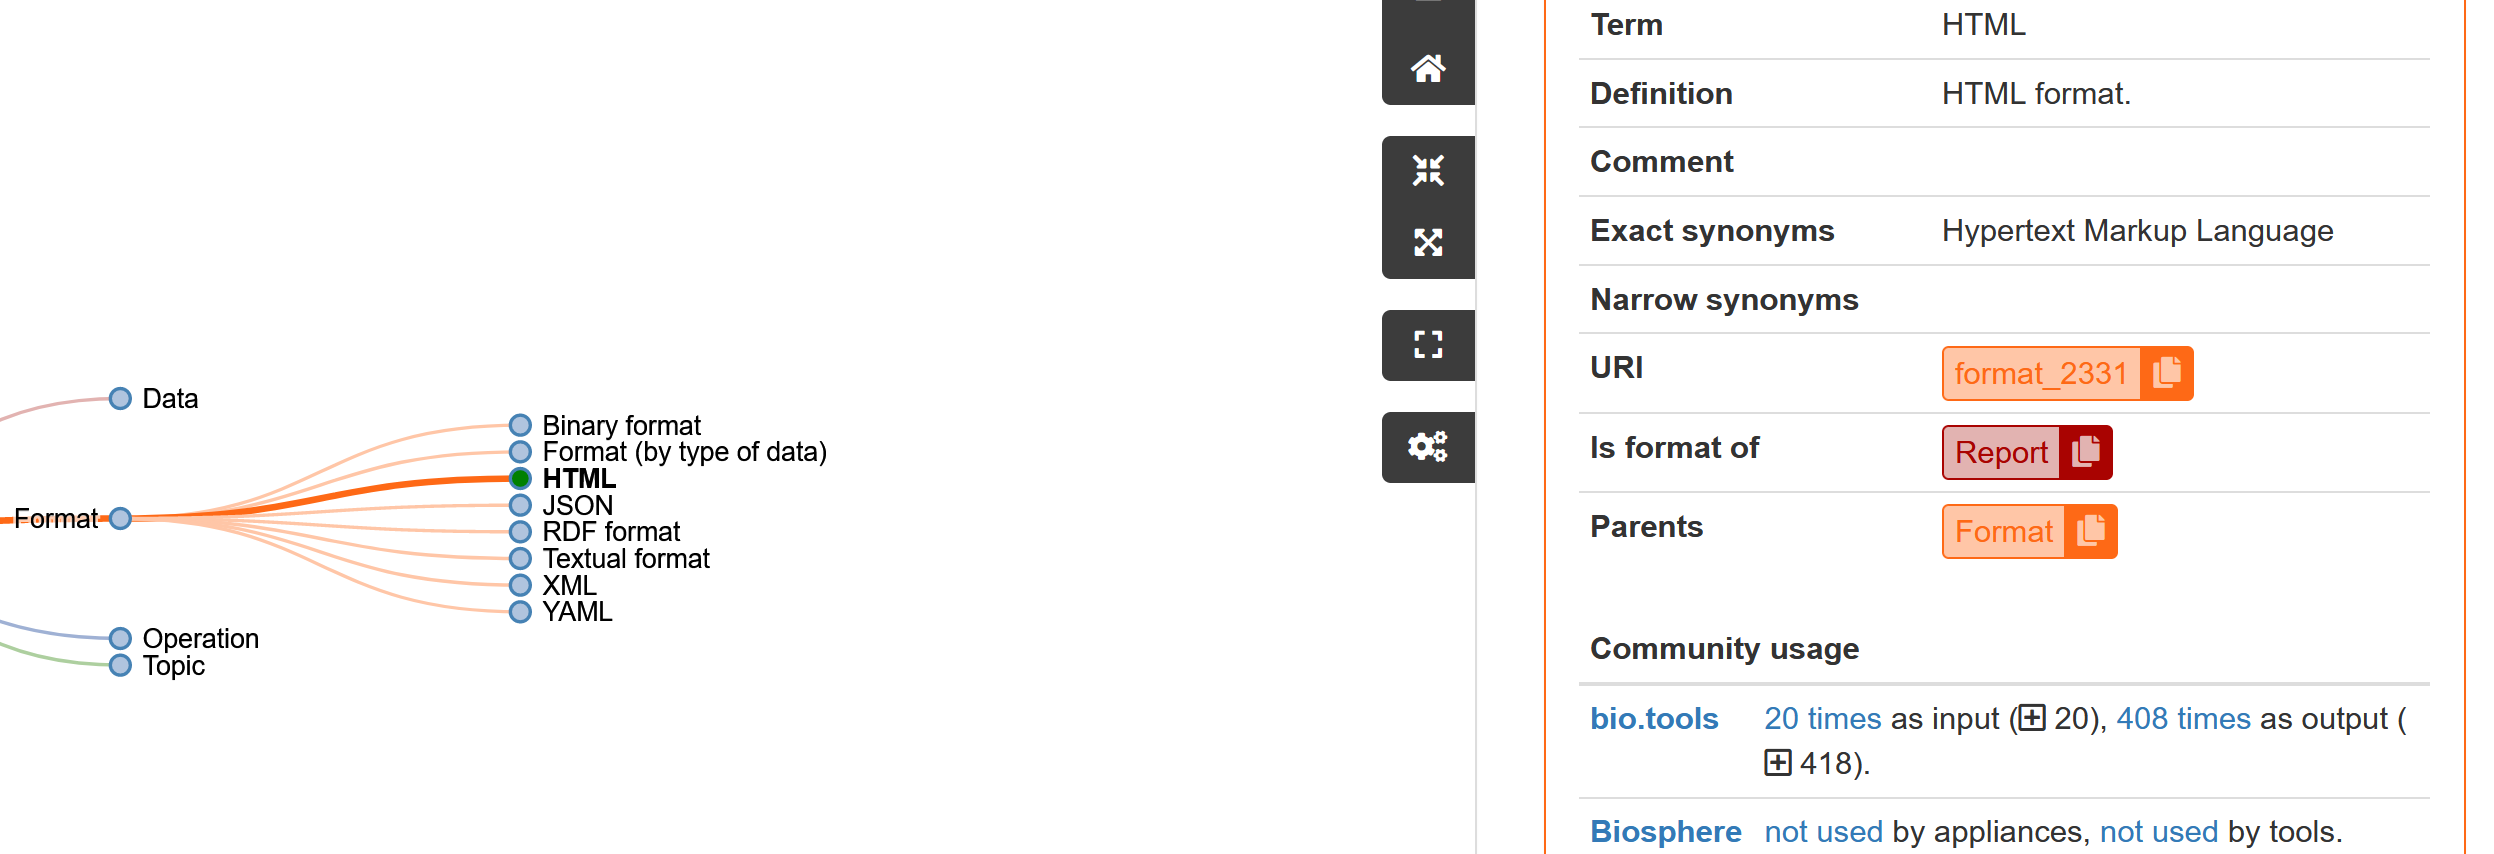